# Частина друга: Аналіз файлів

In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [49]:
data = pd.read_csv('2017_jun_final.csv')

Прочитайте отриману таблицю, використовуючи метод head

In [50]:
data.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Визначте розмір таблиці за допомогою методу shape

In [51]:
data.shape

(8704, 25)

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [52]:
data.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [53]:
data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [54]:
columns_with_nulls = data.isnull().sum() == 0 # looking for columns which have no NaN
columns_with_nulls['Язык.программирования'] = True # setting Язык.программирования as column that we want to leave
filtered_data = data.loc[:, columns_with_nulls] # creating new df without columns with nulls (Язык.программирования excluded) 
filtered_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [55]:
filtered_data = filtered_data.dropna(how= 'any')

Визначте новий розмір таблиці за допомогою методу shape

In [56]:
data_shape = data.shape
filtered_data_shape = filtered_data.shape
print(f'data: rows - {data_shape[0]}, columns - {data_shape[1]}.')
print(f'filtered data: rows - {filtered_data_shape[0]}, columns - {filtered_data_shape[1]}.')

data: rows - 8704, columns - 25.
filtered data: rows - 4854, columns - 20.


In [57]:
python_data = filtered_data[filtered_data['Язык.программирования'] == 'Python']
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


Визначте розмір таблиці python_data за допомогою методу shape

In [58]:
python_data_shape = python_data.shape
print(f'python data: rows - {python_data_shape[0]}, columns - {python_data_shape[1]}.')

python data: rows - 207, columns - 20.


Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [59]:
grouped = python_data.groupby('Должность')
position_aggregated_data = grouped['Зарплата.в.месяц'].agg(['min', 'max', 'mean', 'count'])
position_aggregated_data

,min,max,mean,count
Должность,,,,
Junior Software Engineer,100,1250,560.841270,63
Senior Software Engineer,1300,9200,3387.096774,31
Software Engineer,500,5400,1799.070000,100
System Architect,3000,5000,4000.000000,2
Technical Lead,1425,6200,3165.909091,11


Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [60]:
def fill_avg_salary(row):
    return row[['min','max']].mean()

min_max_avg = position_aggregated_data.apply(fill_avg_salary, axis = 1)
position_aggregated_data_extended = pd.concat([position_aggregated_data, min_max_avg], axis=1)
position_aggregated_data_extended.rename(columns = {0:'min_max_avg'}, inplace = True)
position_aggregated_data_extended


,min,max,mean,count,min_max_avg
Должность,,,,,
Junior Software Engineer,100,1250,560.841270,63,675.0
Senior Software Engineer,1300,9200,3387.096774,31,5250.0
Software Engineer,500,5400,1799.070000,100,2950.0
System Architect,3000,5000,4000.000000,2,4000.0
Technical Lead,1425,6200,3165.909091,11,3812.5


Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [61]:
statistics = position_aggregated_data['mean'].describe()
statistics

count       5.000000
mean     2582.583427
std      1387.255829
min       560.841270
25%      1799.070000
50%      3165.909091
75%      3387.096774
max      4000.000000
Name: mean, dtype: float64

Збережіть отриману таблицю в CSV файл

In [62]:
filename: str = 'position_salary_statistics.csv'
position_aggregated_data.to_csv(filename, index=True)
print(f'Data saved to {filename}.')


Data saved to position_salary_statistics.csv.


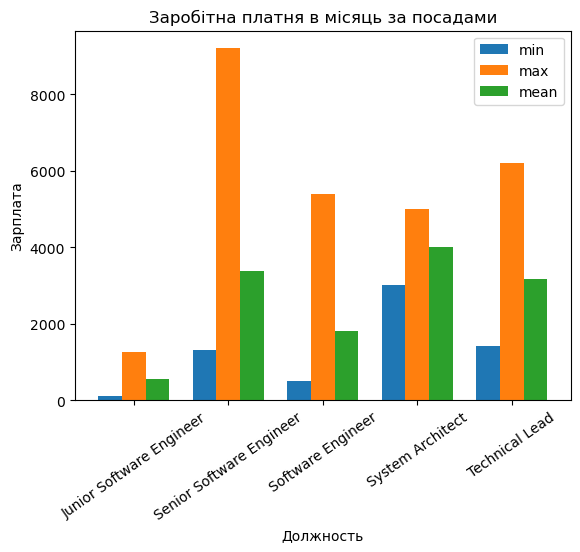

In [82]:
plot_data = position_aggregated_data.drop('count', axis=1)
plot_data.plot.bar(title="Заробітна платня в місяць за посадами", ylabel="Зарплата", rot=35, width=0.75)
plt.show()

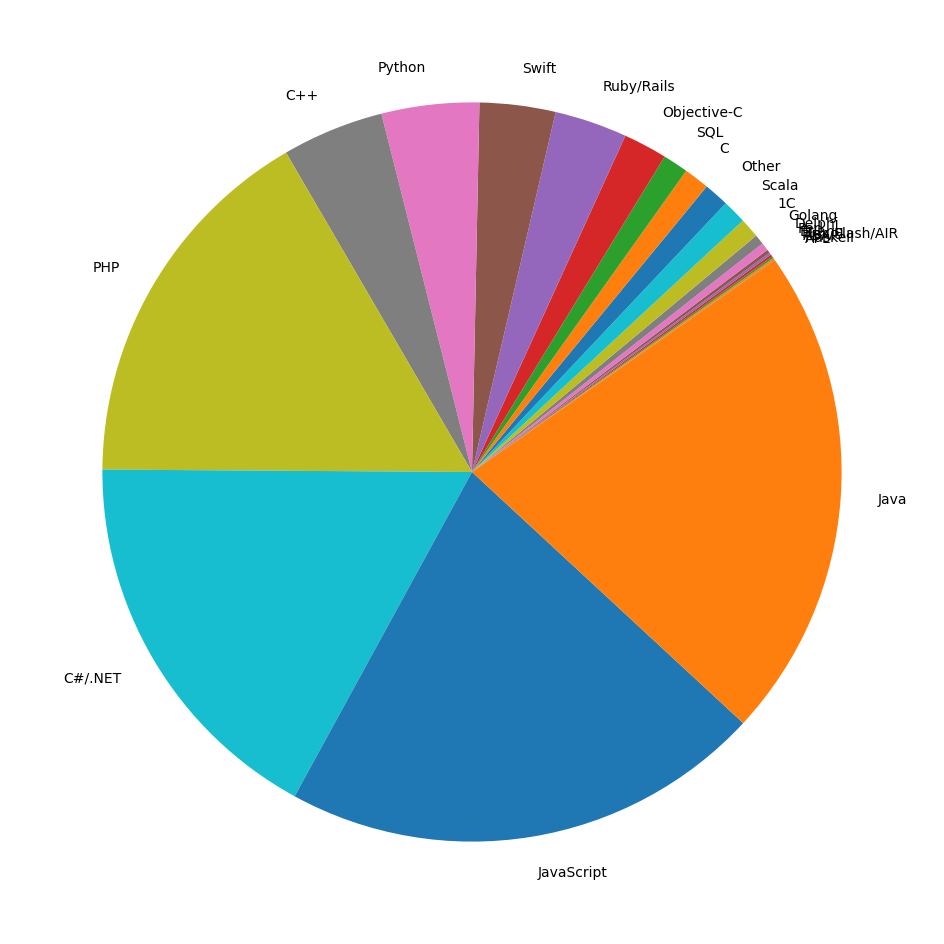

In [102]:
plot_data= filtered_data.groupby('Язык.программирования').agg('count')['N'].sort_values()
plot_data.plot.pie(figsize=(12,12), legend=False, ylabel="", startangle=35, labeldistance=1.1)
plt.show()